No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.003186787012964487, 0.006202661897987127, 0.008447027765214443, 0.02212877757847309, 0.038905574940145016, 0.09933196334168315]
[0.00043026823550462723, 0.0014619361609220505, 0.007620674092322588, 0.01908354042097926, 0.060391205828636885, 0.07054353598505259]
0.003186787012964487 0.00043026823550462723 7.406512379950519
0.006202661897987127 0.0014619361609220505 4.24277206063162
0.008447027765214443 0.007620674092322588 1.1084357712822757
0.02212877757847309 0.01908354042097926 1.1595740145862077
0.038905574940145016 0.060391205828636885 0.6442258339822119
0.09933196334168315 0.07054353598505259 1.4080944760513638


<Figure size 432x288 with 0 Axes>

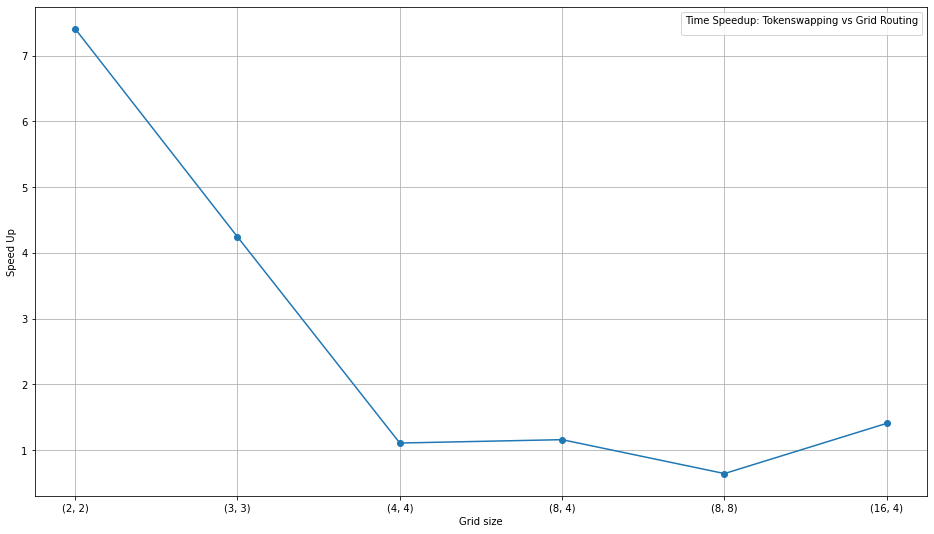

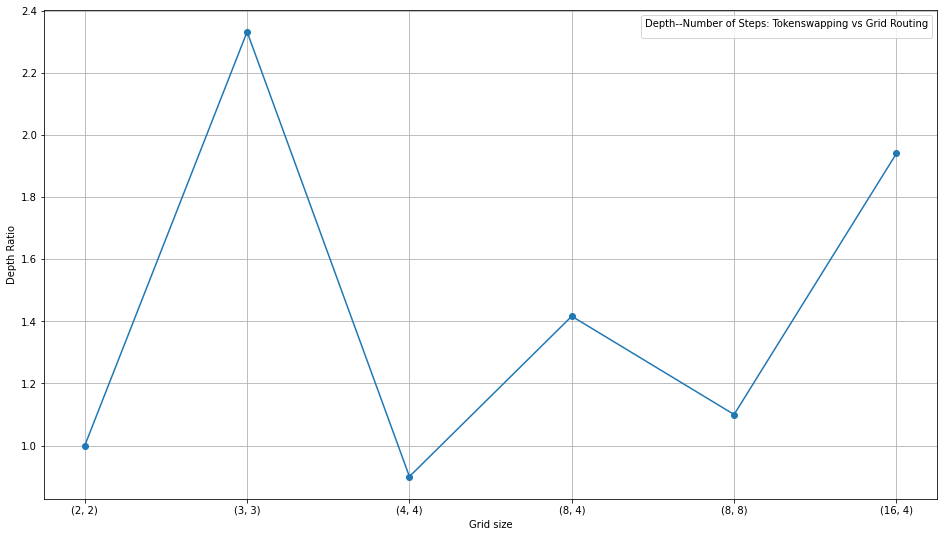

In [103]:
from qtranspiler.architectures import Grid
from qtranspiler.routing.algorithms import approx_token_swapping
from qtranspiler.routing.grid_routing import grid_route
from qtranspiler.utils import random_map, profile_func

from matplotlib import pyplot as plt

grid_dimensions = [
    (2, 2),
    (3, 3),
    (4, 4),
    (8, 4),
    (8, 8),
    (16, 4),
    (16, 8),
    (16, 16),
    (24, 24),
    (32, 8),
    (32, 16),
    (32, 24),
    (64, 8),
    (64, 16),
    (64, 32),
    (64, 64),
    (128, 64)
]
grids = [Grid(*grid) for grid in grid_dimensions]
new_labels = [random_map(g) for g in grids]

zipped_grids_new_labels = zip(grids, new_labels)
grid_route_runs = [
    profile_func(grid_route, g, new_label)
    for g, new_label in zipped_grids_new_labels
]

zipped_grids_new_labels = zip(grids, new_labels)
approx_token_swapping_runs = [
    profile_func(approx_token_swapping, g, new_label)
    for g, new_label in zipped_grids_new_labels
]

grid_steppings = [len(r.return_value) for r in grid_route_runs]
approx_steppings = [len(r.return_value) for r in approx_token_swapping_runs]

grid_timings = [r.time for r in grid_route_runs]
approx_timings = [r.time for r in approx_token_swapping_runs]

speed_ups = [a / g for g, a in zip(grid_timings, approx_timings)]
stepping_ratios = [a / g for g, a in zip(grid_steppings, approx_steppings)]

sizes = [str(g.shape) for g in grids]
plt.figure(1)
plt.figure(figsize=(16, 9))
plt.plot(sizes, speed_ups, '-o')
plt.legend(title='Time Speedup: Tokenswapping vs Grid Routing')
plt.grid(True)
plt.xlabel('Grid size')
plt.ylabel('Speed Up')

plt.figure(2)
plt.figure(figsize=(16, 9))
plt.plot(sizes, stepping_ratios, '-o')
plt.legend(title='Depth--Number of Steps: Tokenswapping vs Grid Routing')
plt.grid(True)
plt.xlabel('Grid size')
plt.ylabel('Depth Ratio')

plt.show()